In [1]:
from ipy import *
%matplotlib inline

In [2]:
dist_file      = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2_des-dist_20151026040000_v2.1.0.cdf'
debug_file     = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2pre_des-debug_20151026040000_v2.0.0.cdf'
photo_file     = 'C:/Yuggoth/Events/2015/mms_fpi_fast_l2_des-bgdist_v1.0.0_p0-2.cdf'
ver            = 'ver2'
CDFs           = {}
CDFs['dist']   = pycdf.CDF(dist_file)
CDFs['bfield'] = pycdf.CDF(debug_file)
CDFs['photo']  = pycdf.CDF(photo_file)
date           = 'Oct_26-0400-0600'
time_format    = '%H:%M:%S'

In [3]:
dude = PAD.load_e_data(CDFs,'mms1','des',ver)

PAD.py:133: RuntimeWarning: invalid value encountered in divide
  counts                   = (FS_dist['Dist']/FS_dist['Err'])**2


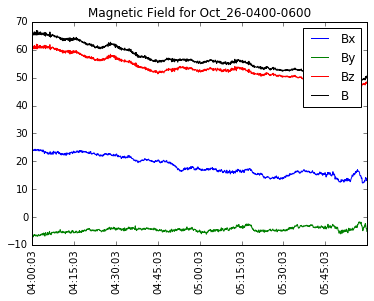

In [4]:
plt.plot(dude['bfield'][:,0]*dude['bfield'][:,3],label='Bx')
plt.plot(dude['bfield'][:,1]*dude['bfield'][:,3],label='By')
plt.plot(dude['bfield'][:,2]*dude['bfield'][:,3],label='Bz')
plt.plot(dude['bfield'][:,3],'k-',label='B')
plt.legend()
plt.title('Magnetic Field for %s' % date)
x        = np.arange(0,1600,200)
x_labels  = []
for px in x:
    x_labels.append(dt.datetime.strftime(dude['edist']['Epoch'][px],time_format))
plt.xticks(x,x_labels,rotation='vertical')
plt.show()

In [5]:
np.average(dude['jN'])

278869.63109352114

In [6]:
for i in range(1300,len(dude['edist']['Epoch']),50):
    PAD.create_flux_survey_spectrum(i,date,'c:/Yuggoth/Events/2015/Oct 26/',dude)
    PAD.create_smooth_survey_PAD_plot(i,date,'c:/Yuggoth/Events/2015/Oct 26/',dude)
    PAD.create_raw_survey_PAD_plot(i,0,32,date,'c:/Yuggoth/Events/2015/Oct 26/',dude)
    PAD.create_raw_survey_PAD_plot_LM(i,0,32,date,'c:/Yuggoth/Events/2015/Oct 26/',dude)
    PAD.visualize_FPI_pixels_in_LM(i,date,'c:/Yuggoth/Events/2015/Oct 26/',dude)

In [7]:
time = 0
LM_vdirs = PAD.convert_to_LM(dude['bfield'][time,0:3]*dude['bfield'][time,3])*dude['v_dirs'][0,0,:]

In [8]:
print "dude['bfield]: atomic with shape\t", dude['bfield'].shape
print "dude['edist'].keys()\t\t\t", dude['edist'].keys()
print "   dude['edist']['Epoch'] atomic with shape", dude['edist']['Epoch'].shape
print "   dude['edist']['Dist']  atomic with shape", dude['edist']['Dist'].shape
print "   dude['edist']['Flag']  atomic with shape", dude['edist']['Flag'].shape
print "   dude['edist']['Err']   atomic with shape", dude['edist']['Err'].shape
print "dude['jN']     atomic with shape\t\t", dude['jN'].shape
print "dude['v_dirs'] atomic with shape\t\t", dude['jN'].shape
print "dude['counts'] atomic with shape\t\t", dude['jN'].shape
print "dude['parms'].keys()\t\t\t", dude['parms'].keys()
print "   dude['parms']['Theta'] atomic with shape", dude['parms']['Theta'].shape
print "   dude['parms']['Phi']   atomic with shape", dude['parms']['Phi'].shape
print "   dude['parms']['Erg']   atomic with shape", dude['parms']['Erg'].shape

dude['bfield]: atomic with shape	(1600L, 4L)
dude['edist'].keys()			['Epoch', 'Dist', 'Flag', 'Err']
   dude['edist']['Epoch'] atomic with shape (1600L,)
   dude['edist']['Dist']  atomic with shape (1600L, 32L, 16L, 32L)
   dude['edist']['Flag']  atomic with shape (1600L,)
   dude['edist']['Err']   atomic with shape (1600L, 32L, 16L, 32L)
dude['jN']     atomic with shape		(1600L, 32L, 16L, 32L)
dude['v_dirs'] atomic with shape		(1600L, 32L, 16L, 32L)
dude['counts'] atomic with shape		(1600L, 32L, 16L, 32L)
dude['parms'].keys()			['Theta', 'Phi', 'Erg']
   dude['parms']['Theta'] atomic with shape (16L,)
   dude['parms']['Phi']   atomic with shape (32L,)
   dude['parms']['Erg']   atomic with shape (32L,)


In [9]:
skippy = PAD.calculate_flux_LM(0,dude)

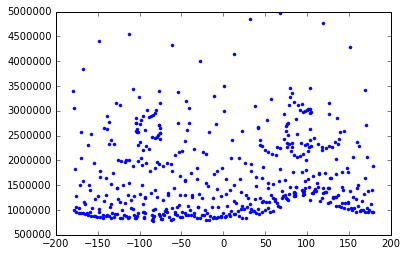

In [10]:
erg = 2
azimuth  = skippy[:,1,erg]
jN_local = skippy[:,2,erg]
plt.plot(azimuth,jN_local,'b.')

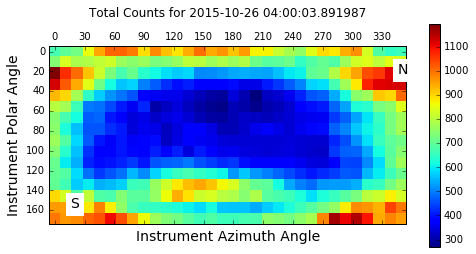

In [11]:
erg        = 0
time_label = 0
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi

if BPhi < 0:
    BPhi   = BPhi + 360

BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['counts'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Total Counts for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

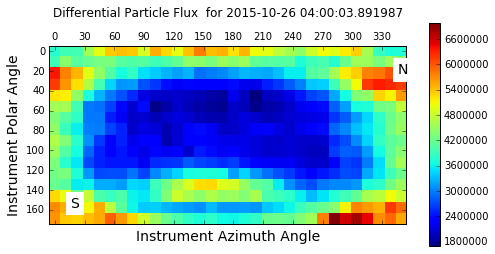

In [12]:
erg        = 0
time_label = 0
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['jN'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Differential Particle Flux  for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

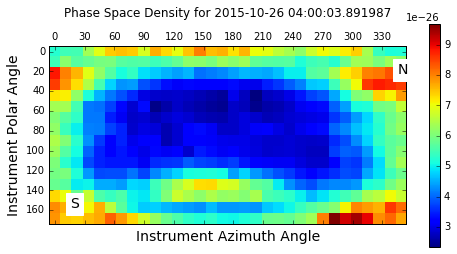

In [13]:
erg        = 0
time_label = 0
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['edist']['Dist'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Phase Space Density for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

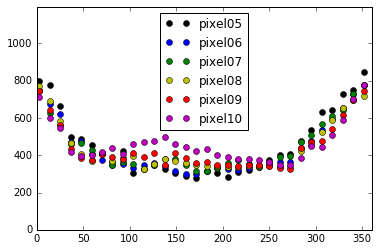

In [14]:
erg = 0 
plt.plot(dude['parms']['Phi'],dude['counts'][0,:,5,erg],'ko',label='pixel05')
plt.plot(dude['parms']['Phi'],dude['counts'][0,:,6,erg],'bo',label='pixel06')
plt.plot(dude['parms']['Phi'],dude['counts'][0,:,7,erg],'go',label='pixel07')
plt.plot(dude['parms']['Phi'],dude['counts'][0,:,8,erg],'yo',label='pixel08')
plt.plot(dude['parms']['Phi'],dude['counts'][0,:,9,erg],'ro',label='pixel09')
plt.plot(dude['parms']['Phi'],dude['counts'][0,:,10,erg],'mo',label='pixel10')
plt.ylim([0,np.max(dude['counts'][0,:,:,erg])])
plt.xlim([0,360])
plt.legend(loc='upper center')

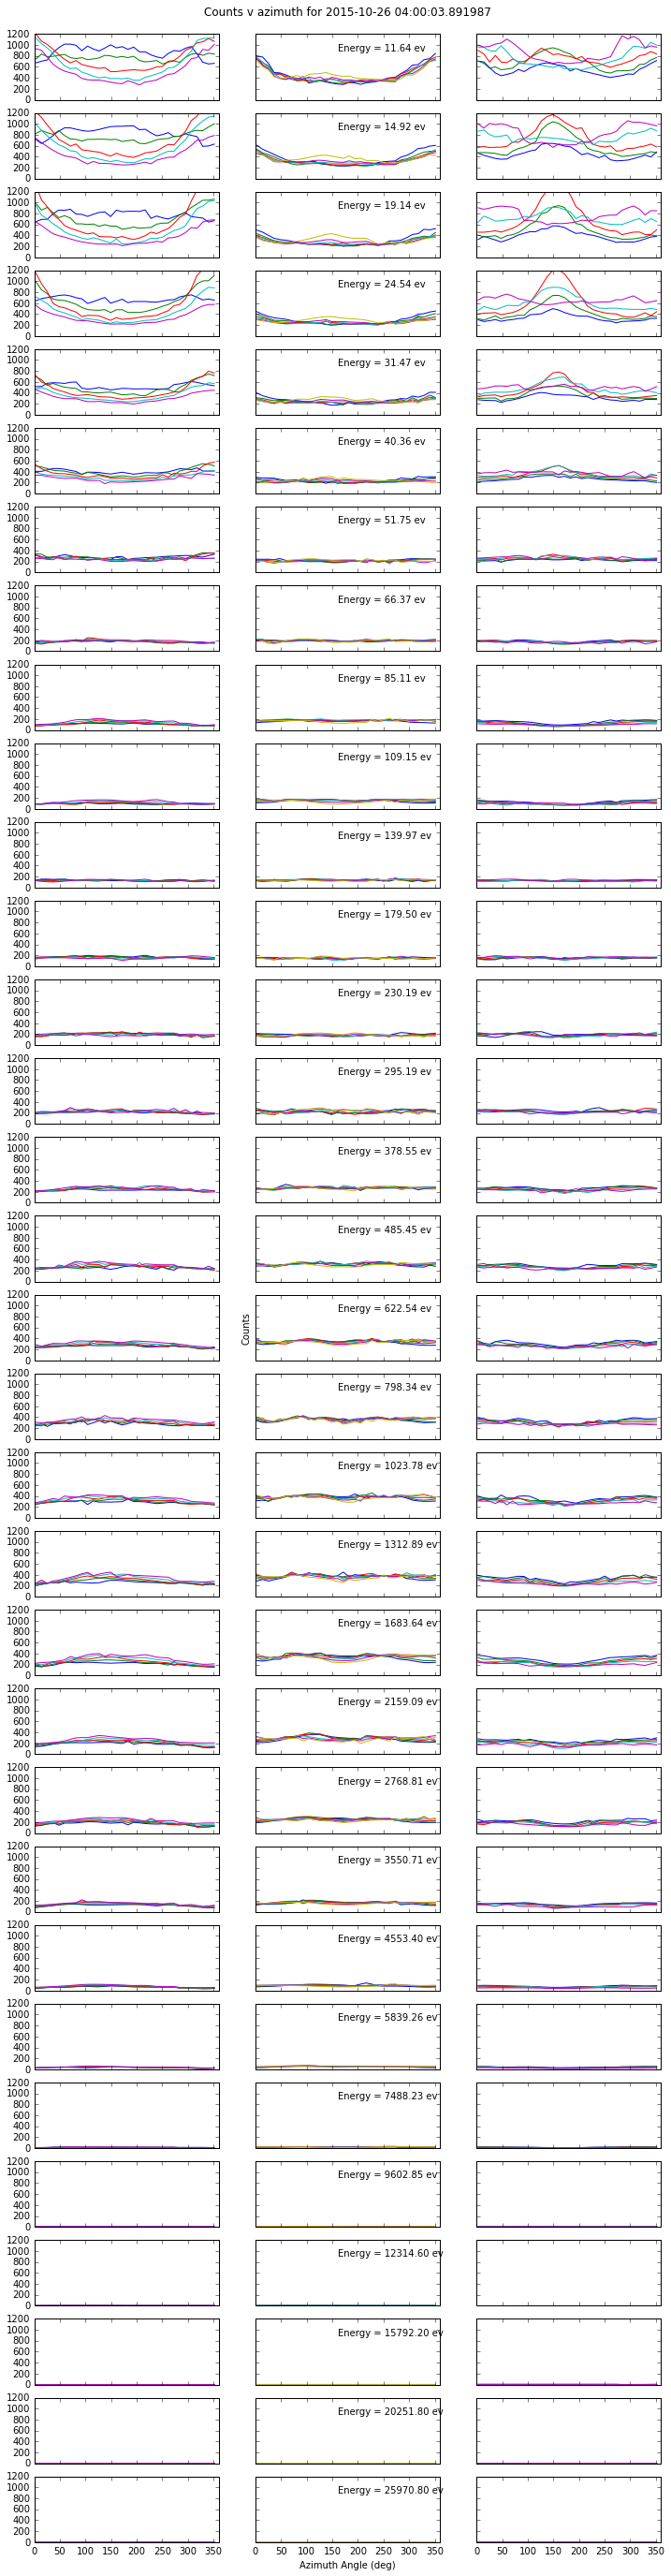

In [15]:
fig7,axes  = plt.subplots(nrows=32,ncols=3,figsize=(12,48),sharex=True,sharey=True)
#plt.subplots_adjust(hspace=0.0, wspace=0.0)
for row in range(32):
    for col in range(3):
        if col == 0:
            pix_range = slice(0,5)
        if col== 1:
            pix_range = slice(5,11)
            axes[row][col].annotate('Energy = %.2f ev'  % dude['parms']['Erg'][row],xy=(160,900),fontsize=10)
        if col == 2:
            pix_range = slice(11,16)
        axes[row][col].plot(dude['parms']['Phi'],dude['counts'][0,:,pix_range,row])
        axes[row][col].set_ylim([0,np.max(dude['counts'][0,:,:,erg])])
        axes[row][col].set_xlim([0,360])

axes[0][1].set_title('Counts v azimuth for %s\n' % dude['edist']['Epoch'][time_label])        
axes[row][col-1].set_xlabel('Azimuth Angle (deg)')
axes[16][1].set_ylabel('Counts')

In [16]:
skippy.shape

(512L, 3L, 32L)

In [17]:
dude['edist']['Epoch'][0]

datetime.datetime(2015, 10, 26, 4, 0, 3, 891987)

In [18]:
print dt.datetime.strftime(dude['edist']['Epoch'][0],time_format)


04:00:03


In [19]:
scpot1 = pycdf.CDF("Z:/mms1/edp/fast/l2/scpot/2015/10/mms1_edp_fast_l2_scpot_20151026000000_v2.0.0.cdf")
scpot2 = pycdf.CDF("Z:/mms2/edp/fast/l2/scpot/2015/10/mms2_edp_fast_l2_scpot_20151026000000_v2.0.0.cdf")
scpot3 = pycdf.CDF("Z:/mms3/edp/fast/l2/scpot/2015/10/mms3_edp_fast_l2_scpot_20151026000000_v2.0.0.cdf")
scpot4 = pycdf.CDF("Z:/mms4/edp/fast/l2/scpot/2015/10/mms4_edp_fast_l2_scpot_20151026000000_v2.0.0.cdf")

In [20]:
scpot1.keys()

['mms1_edp_epoch_fast_l2',
 'mms1_edp_label1_fast_l2',
 'mms1_edp_scpot_fast_l2',
 'mms1_edp_psp_fast_l2',
 'mms1_edp_dcv_fast_l2',
 'mms1_edp_bitmask_fast_l2',
 'mms1_edp_quality_fast_l2',
 'mms1_edp_deltap_fast_l2']

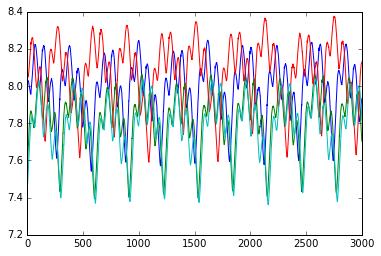

In [21]:
plt.plot(scpot1['mms1_edp_scpot_fast_l2'][24000:27000])
plt.plot(scpot2['mms2_edp_scpot_fast_l2'][24000:27000])
plt.plot(scpot3['mms3_edp_scpot_fast_l2'][24000:27000])
plt.plot(scpot4['mms4_edp_scpot_fast_l2'][24000:27000])

In [22]:
N = 25000
scpot1['mms1_edp_epoch_fast_l2'][N]

datetime.datetime(2015, 10, 26, 4, 0, 10, 85129)

In [228]:
CDFs['dist'].attrs

<gAttrList:
ADID_ref: 
Acknowledgement: 
Correction_table_name: mms1_des_rf1ct_yyyymmddhhmmss_yyyymmddhhmmss [CDF_CHAR]
Correction_table_rev: 00000 [CDF_CHAR]
Correction_table_scaling_factor: 1.0 [CDF_CHAR]
Data_type: fast_l2_des-dist [CDF_CHAR]
Data_version: 0.0.0 [CDF_CHAR]
Dead_time_correction: 100ns [CDF_CHAR]
Descriptor: DES>Dual Electron Spectrometers [CDF_CHAR]
Discipline: Space Physics>Magnetospheric Science [CDF_CHAR]
File_naming_convention: source_descriptor_datatype_yyyyMMddHHmmss [CDF_CHAR]
Generated_by: FPI ITF, NASA/GSFC Code 673 [CDF_CHAR]
Generation_date: Sat Feb 13 19:40:42 2016 [CDF_CHAR]
HTTP_LINK: 
Instrument_type: Plasma and Solar Wind [CDF_CHAR]
                 Particles (space) [CDF_CHAR]
LINK_TEXT: 
LINK_TITLE: 
Logical_file_id: mms1_fpi_fast_l2_des-dist_20151026040000_v2.1.0 [CDF_CHAR]
Logical_source: mms1_fpi_fast_l2_des-dist [CDF_CHAR]
Logical_source_description: MMS Satellite Number 1 Dual Electron Spectrometer FastSurvey-resolution instrument distributions

In [23]:
time_label = 0
CDFs['dist']['mms1_des_startdelphi_count_fast'][time_label]

array(2610, dtype=uint16)